# OpenLDAP
OpenLDAP is an open-source LDAP implementation.  LDAP servers, like OpenLDAP and Active Directory, are often used as an Identity Provider (IdP) to store users and groups for organizations and enterprises.

## Install OpenLDAP
For our OpenLDAP installation, we're going to use a helm chart that combines the [OpenLDAP](https://www.openldap.org), [phpLDAPAdmin](https://github.com/leenooks/phpLDAPadmin), and the [LDAP Toolbox Self-Service Password](https://github.com/ltb-project/self-service-password) projects.

### Register Helm Repository
Start by first registering the helm registry:

In [1]:
helm repo add helm-openldap https://jp-gouin.github.io/helm-openldap/

"helm-openldap" has been added to your repositories


: 1

### Install Helm Chart
Install the helm chart next:

In [2]:
helm upgrade --install -n openldap --create-namespace openldap helm-openldap/openldap-stack-ha -f values.nephtek.yaml

Release "openldap" does not exist. Installing it now.
NAME: openldap
LAST DEPLOYED: Sat Mar 26 09:34:25 2022
NAMESPACE: openldap
STATUS: deployed
REVISION: 1
TEST SUITE: None
NOTES:
** Please be patient while the chart is being deployed **

OpenLDAP-Stack-HA has been installed. You can access the server from within the k8s cluster using:

  openldap-openldap-stack-ha.openldap.svc.cluster.local:389
  
  Or
  
  openldap-openldap-stack-ha.openldap.svc.cluster.local:636


You can access the LDAP adminPassword and configPassword using:

  kubectl get secret --namespace openldap openldap-openldap-stack-ha -o jsonpath="{.data.LDAP_ADMIN_PASSWORD}" | base64 --decode; echo
  kubectl get secret --namespace openldap openldap-openldap-stack-ha -o jsonpath="{.data.LDAP_CONFIG_PASSWORD}" | base64 --decode; echo


You can access the LDAP service, from within the cluster (or with kubectl port-forward) with a command like (replace password and domain):
  ldapsearch -x -H ldap://openldap-openldap-stack

: 1

### Login to phpldapadmin
After the helm chart has installed and the pods in the `openldap` namespace are ready, two new ingresses are exposed:
- https://ssl-ldap2.k8s.nephtek.com
- https://phpldapadmin.k8s.nephtek.com

To login to phpLDAPAdmin, use the username `cn=admin,dc=nephtek,dc=com` and the password `admin`.  Depending upon your browser (e.g. Safari on MacOS), you may need to reload the page after logging in: 

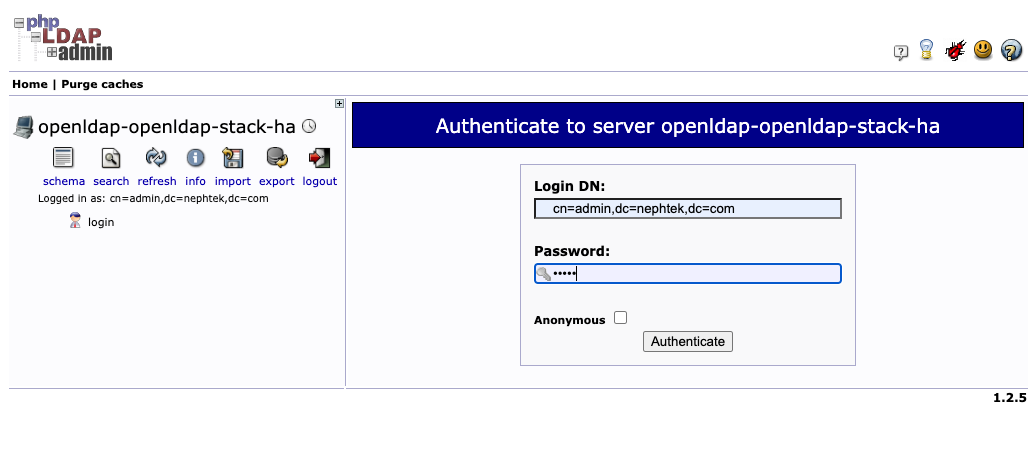

### Import ou.ldif
Once logged in, import the ou.ldif file to get a sample organization.  Click on the `import` icon near the top-let, then select `Choose file` for the `Select an LDIF file` prompt on the import screen, and select the ou.ldif file in the `Public_Notebooks/openldap` directory:

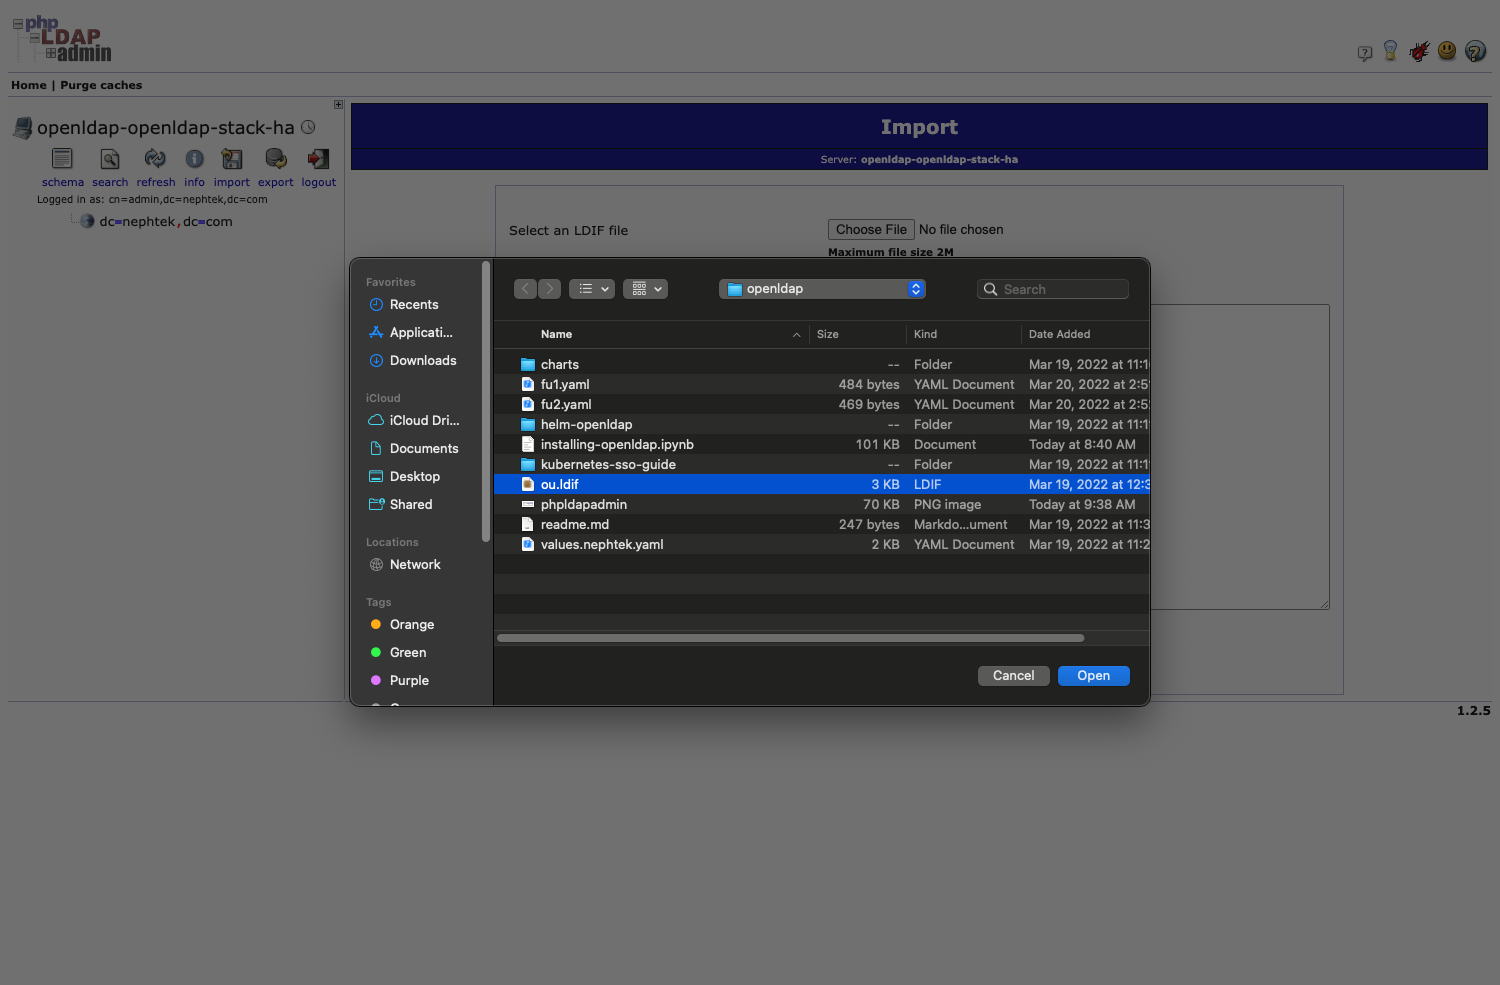

Then press the `Proceed >>` button.  If the processs succceeds, the screen should look like:

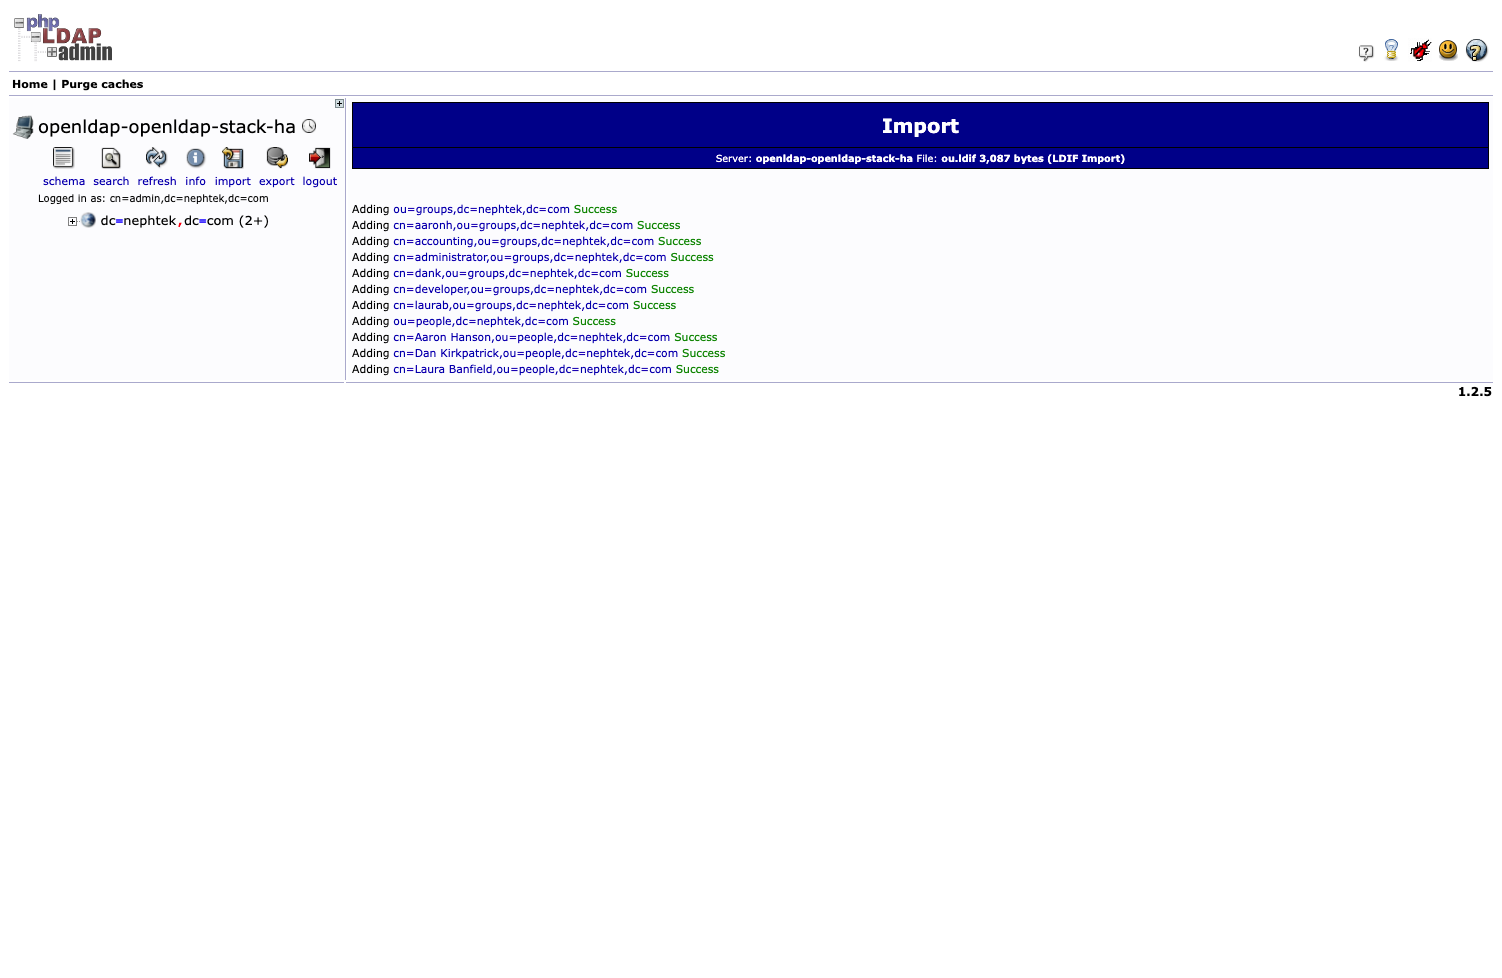

In [ ]:
### Finished

### Next Steps